In [10]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import time

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy
import cProfile

In [19]:

##############################
######## PARAMETERS ##########
##############################

d = 2 #dimension of the particles 
n = 100 # nombre de particules pour q
m = 100 # nombre de particules pour p
T = 300 # nombre d'itérations
h = 0.004 # stepsize gradient descent
eps = 0.0001
alpha = 0.01

### KERNEL ###
sigma = 0.15 
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x,y,sigma)


#### DIVERGENCE ####
J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
#dJ = lambda x : np.array([dv.WGrad_KKL(x[i],x, y, k, dk, Packy, alpha, sigma) for i in range(n)])
dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 

# Etoile

In [20]:
####### INITIAL DISTRIBUTIONS P AND Q  ########


x0= scs.multivariate_normal.rvs(0.5 * np.array([np.cos(-3 * np.pi/4),np.sin(-3* np.pi/4)]),0.01 * np.identity(2),n)
y = gy.shape("images/etoile.jpg",m)


#### Matrice Ky, eigenvalues and eigenvectors ####
Ky = 1/m * k(y,y) #1/m * np.array([[k(y[i],y[j],sigm(x0,y)) for i in range(m)] for j in range(m)])
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

###########################################
############ GRADIENT DESCENT #############
###########################################

t0 = time.time()
X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
print(time.time()-t0)
#cProfile.run('gd.gradient_descent(J, dJ, x0, h, eps, T)')

Text(0.5, 1.0, 'Values of the gradient of $KKL_{\\alpha}')

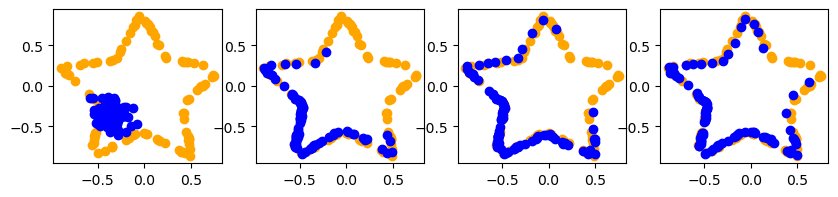

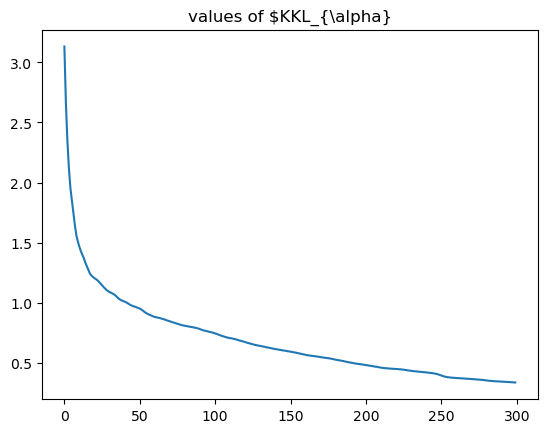

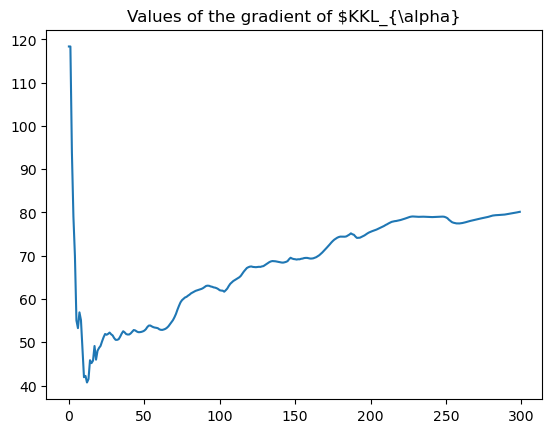

In [33]:
############################
########## PLOTS ###########
############################


fig, axs = plt.subplots(1, 4, figsize=(10,2))
for i in range(4):
    t = i * T // 4
    axs[i%4].scatter(y[:,0],y[:,1],color = "orange",width = 0.1)
    axs[i%4].scatter(X[t,:,0], X[t,:,1], color = "blue",width=0.)
    #axs[i%4].title("T = " + str(t))


plt.figure()    
plt.plot(l_J)
plt.title(r"values of $KKL_{\alpha}")

plt.figure()
plt.plot(Grad)
plt.title(r"Values of the gradient of $KKL_{\alpha}")